In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor

import warnings
warnings.filterwarnings('ignore')

 **Reading and Understanding**

In [29]:
#READ DATA
data = pd.read_csv('day.csv')
#HAVE LOOK AT DATA
data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


**Data Quality Checks**

In [30]:
#checking for datatypes of columns
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB



*  No missing values




In [31]:
#Get basic idea of data using describe()
data.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [32]:
#check shape of data
data.shape

(730, 16)

**Duplicate Check**

In [33]:
bike_copy = data.copy()

# Checking for duplicates and dropping the entire duplicate row if any
bike_copy.drop_duplicates(subset=None, inplace=True)
bike_copy.shape

(730, 16)

In [34]:
data.shape

(730, 16)

**Insights**
1. The shape after running the drop duplicate command is same as the original dataframe.

2. Hence we can conclude that there were zero duplicate values in the dataset.

**Visualizing Continuous Variables¶**

In [35]:
# dropping `instant`,`dteday`,`casual`,`registered`

data = data.drop(columns=['instant','dteday','casual','registered'])

These variables were dropped since instant is the just the serial number of the record, dteday is redundant coz the required data for analysis is contained in mnth,yr casual + registered = cnt. cnt is our target variable so we will not consider casual and registered.

In [36]:
# summary statistics of numerical variables
data[['temp','atemp','hum','windspeed']].describe()

,temp,atemp,hum,windspeed
count,730.000000,730.000000,730.000000,730.000000
mean,20.319259,23.726322,62.765175,12.763620
std,7.506729,8.150308,14.237589,5.195841
min,2.424346,3.953480,0.000000,1.500244
25%,13.811885,16.889713,52.000000,9.041650
50%,20.465826,24.368225,62.625000,12.125325
75%,26.880615,30.445775,72.989575,15.625589
max,35.328347,42.044800,97.250000,34.000021


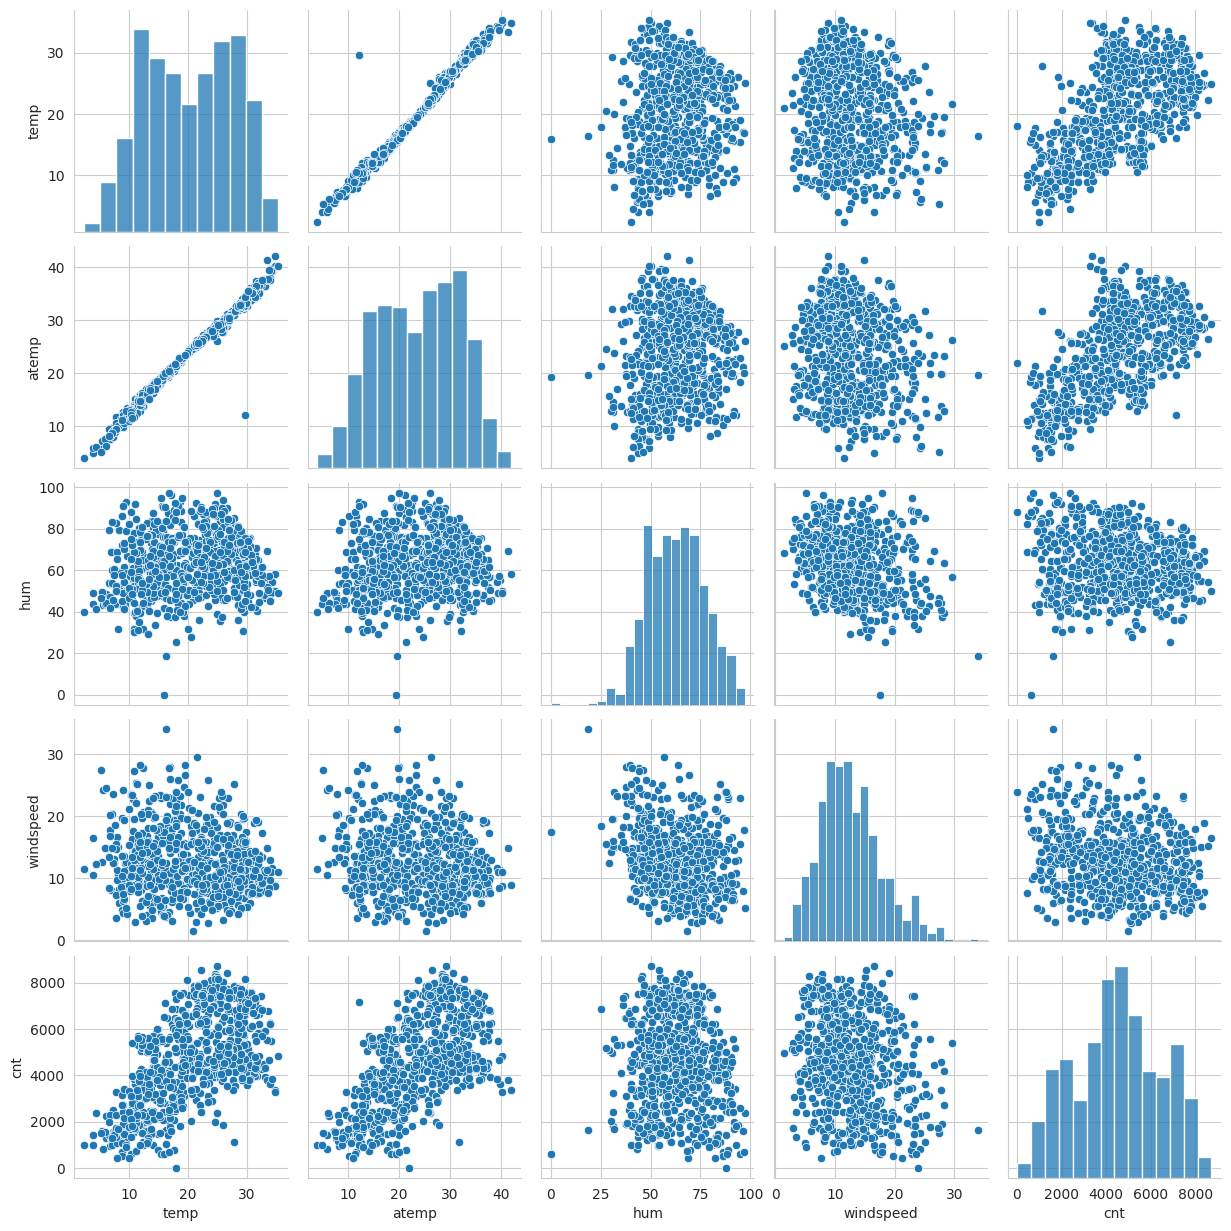

In [37]:
sns.pairplot(data, vars=['temp','atemp','hum','windspeed',"cnt"])
plt.show()

from above graphs we can say that temp and atemp have a relationship
let check the correlation









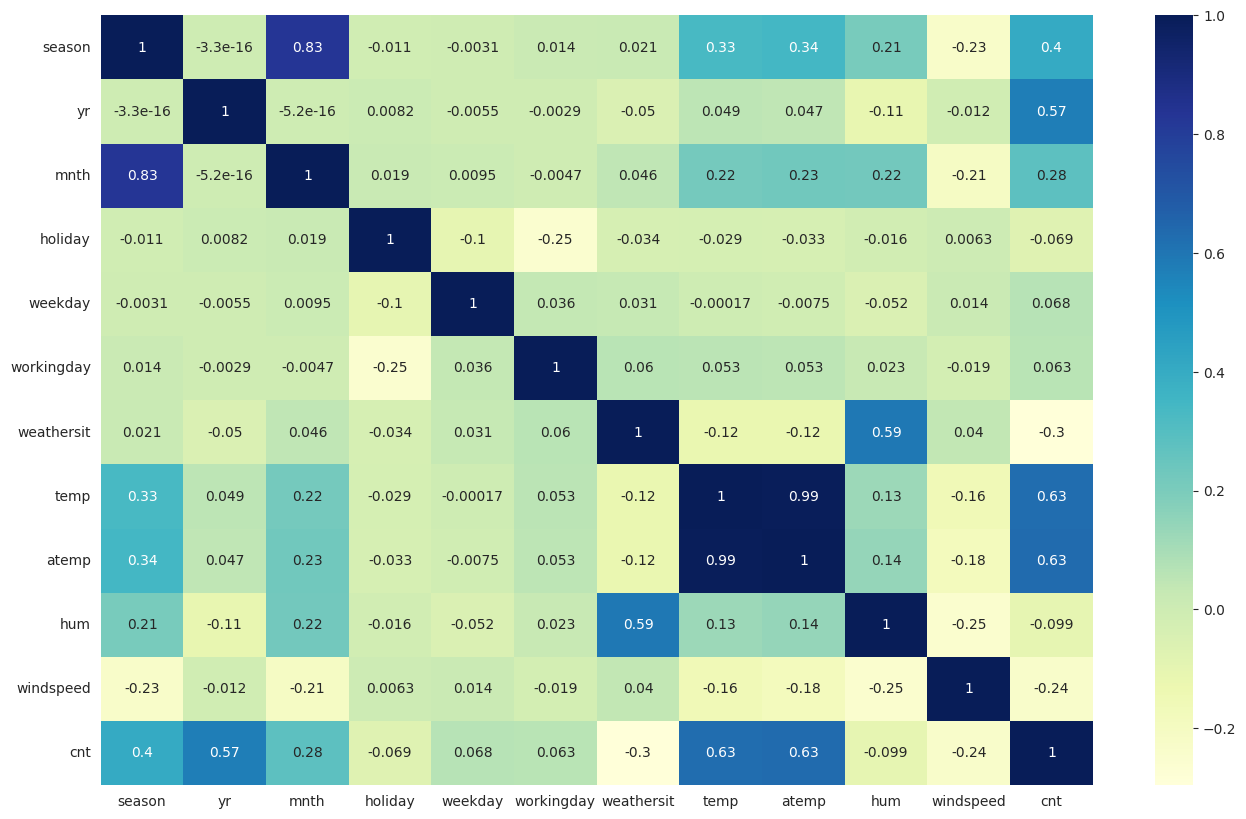

In [38]:
plt.figure(figsize = (16, 10))
sns.heatmap(data.corr(), annot = True, cmap="YlGnBu")
plt.show()

1. correlation between temp and atemp is 0.99 which is almost 1
2. Let us drop temp and consider atemp



In [39]:
data.drop(['temp'],axis=1,inplace=True)
data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,11.46350,43.6957,12.522300,1600


Visualizing Categorical Variables¶

1. from data we can see that: season,yr,mnth,holiday,weekday,workingday,weathersit all are categorical variables
2. We will replace season,weekday and weathersit with appropriate values

In [40]:
data['season'].replace({1:"spring",2:"summer",3:"fall",4:"winter"},inplace=True)
data.head(10)

,season,yr,mnth,holiday,weekday,workingday,weathersit,atemp,hum,windspeed,cnt
0,spring,0,1,0,6,0,2,18.18125,80.5833,10.749882,985
1,spring,0,1,0,0,0,2,17.68695,69.6087,16.652113,801
2,spring,0,1,0,1,1,1,9.47025,43.7273,16.636703,1349
3,spring,0,1,0,2,1,1,10.60610,59.0435,10.739832,1562
4,spring,0,1,0,3,1,1,11.46350,43.6957,12.522300,1600
5,spring,0,1,0,4,1,1,11.66045,51.8261,6.000868,1606
6,spring,0,1,0,5,1,2,10.44195,49.8696,11.304642,1510
7,spring,0,1,0,6,0,2,8.11270,53.5833,17.875868,959
8,spring,0,1,0,0,0,1,5.80875,43.4167,24.250650,822
9,spring,0,1,0,1,1,1,7.54440,48.2917,14.958889,1321


In [41]:
data['weathersit'].replace({1:"Clear_Few Clouds",2:"Mist_cloudy",3:"Light rain_Light snow_Thunderstorm",4:'Heavy Rain_Ice Pallets_Thunderstorm_Mist'},inplace=True)
data.head(10)

,season,yr,mnth,holiday,weekday,workingday,weathersit,atemp,hum,windspeed,cnt
0,spring,0,1,0,6,0,Mist_cloudy,18.18125,80.5833,10.749882,985
1,spring,0,1,0,0,0,Mist_cloudy,17.68695,69.6087,16.652113,801
2,spring,0,1,0,1,1,Clear_Few Clouds,9.47025,43.7273,16.636703,1349
3,spring,0,1,0,2,1,Clear_Few Clouds,10.60610,59.0435,10.739832,1562
4,spring,0,1,0,3,1,Clear_Few Clouds,11.46350,43.6957,12.522300,1600
5,spring,0,1,0,4,1,Clear_Few Clouds,11.66045,51.8261,6.000868,1606
6,spring,0,1,0,5,1,Mist_cloudy,10.44195,49.8696,11.304642,1510
7,spring,0,1,0,6,0,Mist_cloudy,8.11270,53.5833,17.875868,959
8,spring,0,1,0,0,0,Clear_Few Clouds,5.80875,43.4167,24.250650,822
9,spring,0,1,0,1,1,Clear_Few Clouds,7.54440,48.2917,14.958889,1321


In [46]:
data['weekday'].replace({0:"Sunday",1:"Monday",2:"Tuesday",3:"Wednesday",4:"Thursday",5:"Friday",6:"Saturday"},inplace=True)
data.head(10)

,season,yr,mnth,holiday,weekday,workingday,weathersit,atemp,hum,windspeed,cnt
0,spring,0,1,0,Saturday,0,Mist_cloudy,18.18125,80.5833,10.749882,985
1,spring,0,1,0,Sunday,0,Mist_cloudy,17.68695,69.6087,16.652113,801
2,spring,0,1,0,Monday,1,Clear_Few Clouds,9.47025,43.7273,16.636703,1349
3,spring,0,1,0,Tuesday,1,Clear_Few Clouds,10.60610,59.0435,10.739832,1562
4,spring,0,1,0,Wednesday,1,Clear_Few Clouds,11.46350,43.6957,12.522300,1600
5,spring,0,1,0,Thursday,1,Clear_Few Clouds,11.66045,51.8261,6.000868,1606
6,spring,0,1,0,Friday,1,Mist_cloudy,10.44195,49.8696,11.304642,1510
7,spring,0,1,0,Saturday,0,Mist_cloudy,8.11270,53.5833,17.875868,959
8,spring,0,1,0,Sunday,0,Clear_Few Clouds,5.80875,43.4167,24.250650,822
9,spring,0,1,0,Monday,1,Clear_Few Clouds,7.54440,48.2917,14.958889,1321


In [47]:
data['mnth'].replace({
    1 : 'january',
    2 : 'february',
    3 : 'march',
    4 : 'april',
    5 : 'may',
    6 : 'june',
    7 : 'july',
    8 : 'august',
    9 : 'september',
    10 : 'october',
    11 : 'november',
    12 : 'december'
},inplace=True)
data.head(10)

,season,yr,mnth,holiday,weekday,workingday,weathersit,atemp,hum,windspeed,cnt
0,spring,0,january,0,Saturday,0,Mist_cloudy,18.18125,80.5833,10.749882,985
1,spring,0,january,0,Sunday,0,Mist_cloudy,17.68695,69.6087,16.652113,801
2,spring,0,january,0,Monday,1,Clear_Few Clouds,9.47025,43.7273,16.636703,1349
3,spring,0,january,0,Tuesday,1,Clear_Few Clouds,10.60610,59.0435,10.739832,1562
4,spring,0,january,0,Wednesday,1,Clear_Few Clouds,11.46350,43.6957,12.522300,1600
5,spring,0,january,0,Thursday,1,Clear_Few Clouds,11.66045,51.8261,6.000868,1606
6,spring,0,january,0,Friday,1,Mist_cloudy,10.44195,49.8696,11.304642,1510
7,spring,0,january,0,Saturday,0,Mist_cloudy,8.11270,53.5833,17.875868,959
8,spring,0,january,0,Sunday,0,Clear_Few Clouds,5.80875,43.4167,24.250650,822
9,spring,0,january,0,Monday,1,Clear_Few Clouds,7.54440,48.2917,14.958889,1321


In [48]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   atemp       730 non-null    float64
 8   hum         730 non-null    float64
 9   windspeed   730 non-null    float64
 10  cnt         730 non-null    int64  
dtypes: float64(3), int64(4), object(4)
memory usage: 62.9+ KB


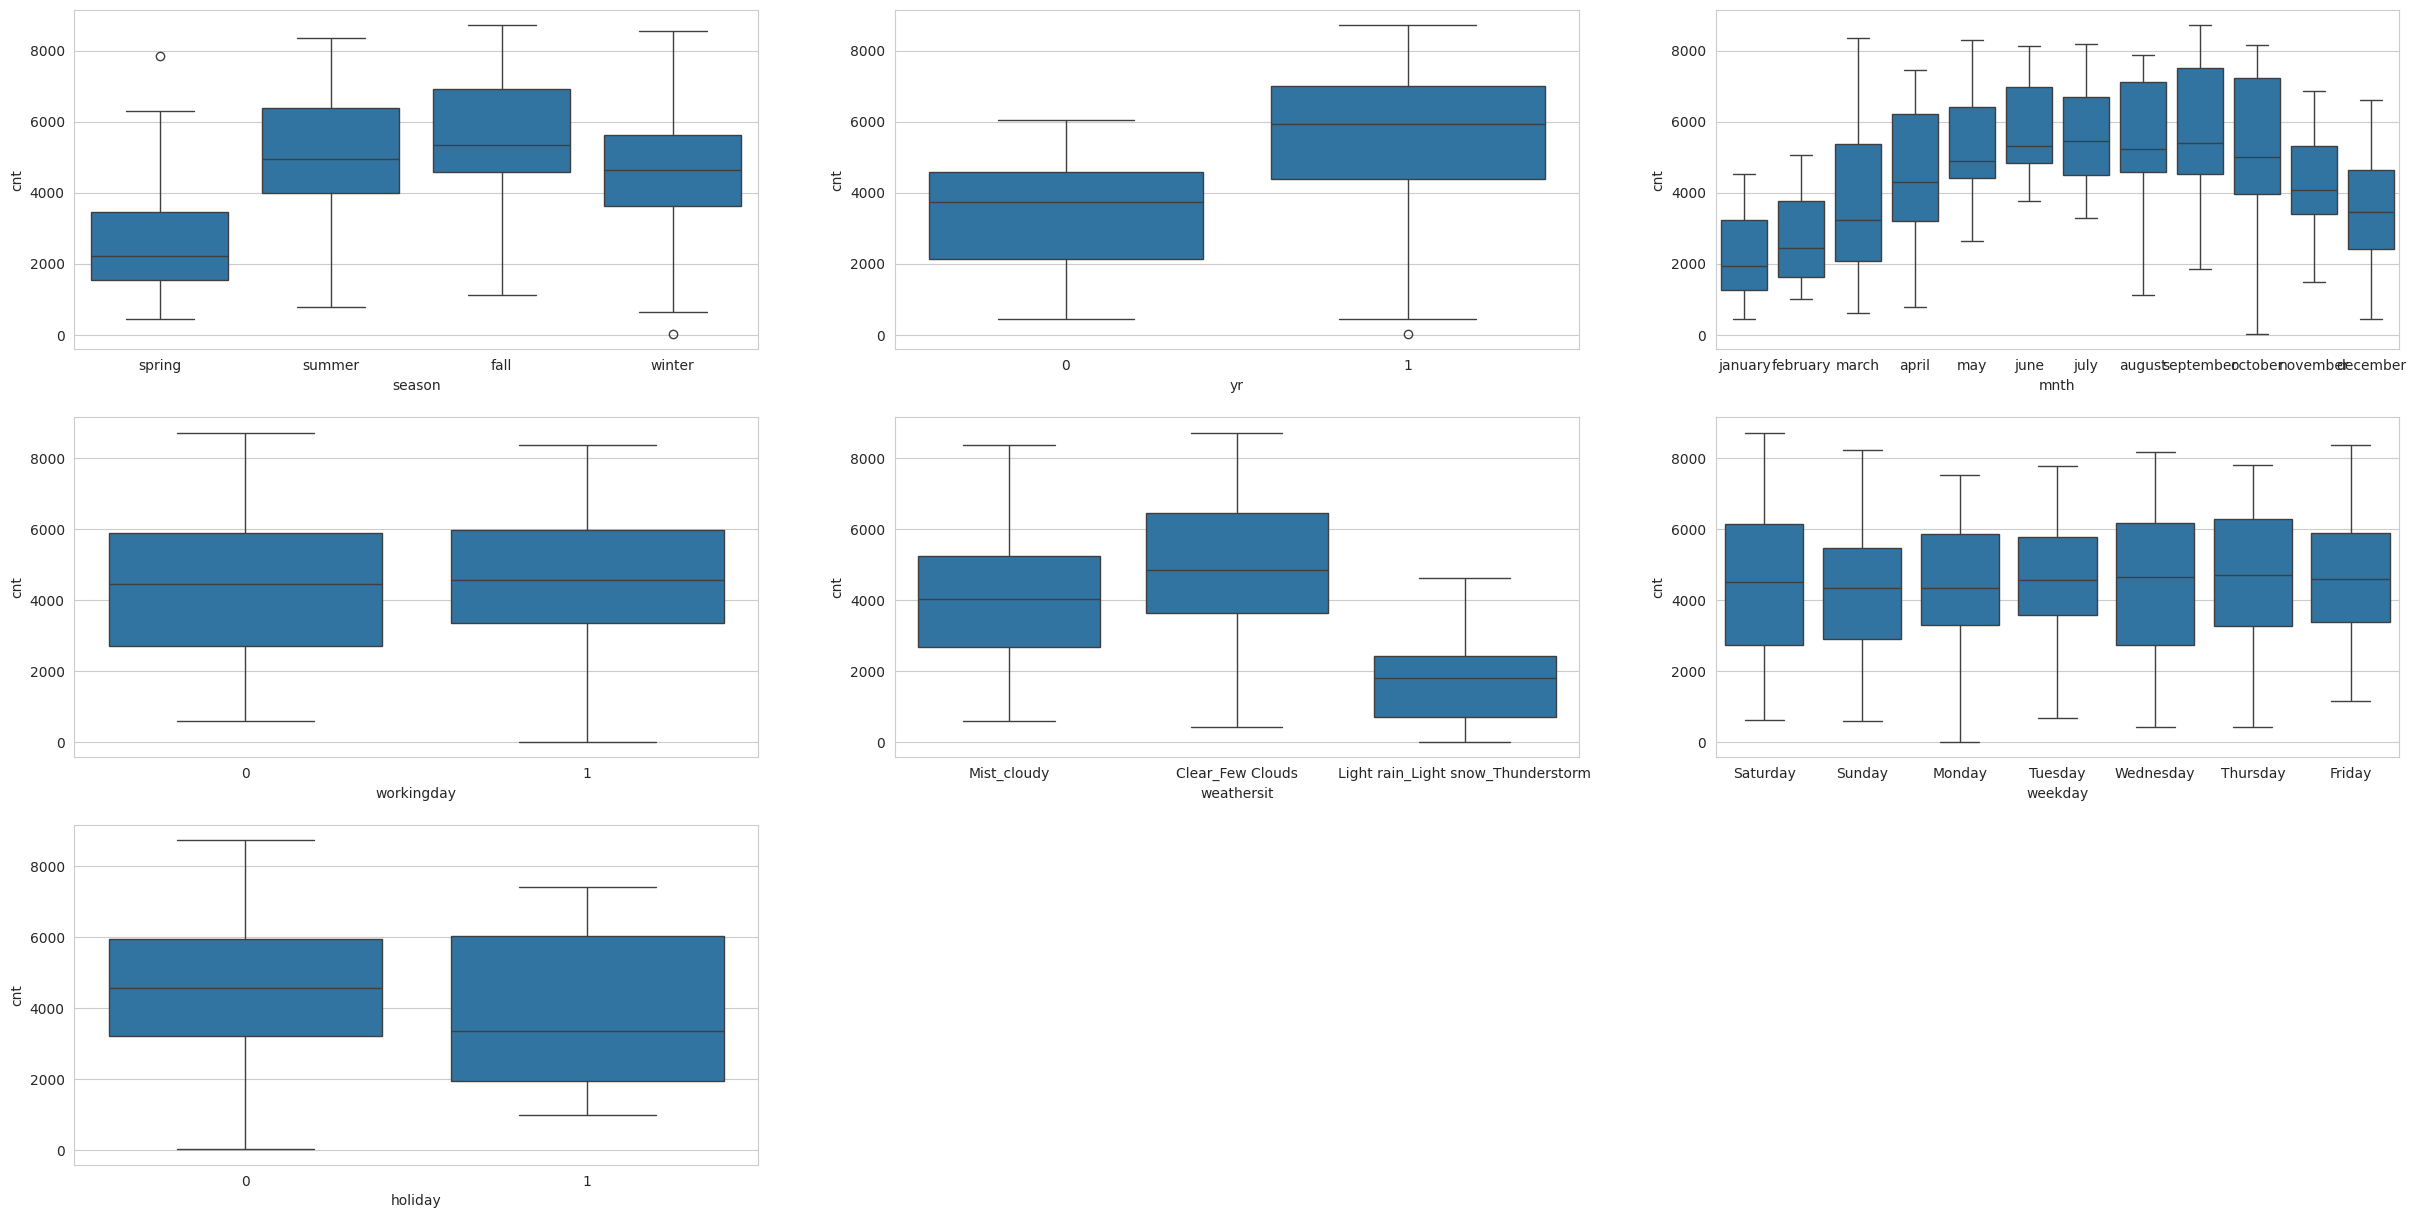

In [57]:
#Visualising categorical Variables to understand data better
plt.figure(figsize=(30, 15))
plt.subplot(3,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = data,patch_artist=True)#yr','mnth','workingday','weathersit','weekday'
plt.subplot(3,3,2)
sns.boxplot(x = 'yr', y = 'cnt', data = data)
plt.subplot(3,3,3)
sns.boxplot(x = 'mnth', y = 'cnt', data = data)
plt.subplot(3,3,4)
sns.boxplot(x = 'workingday', y = 'cnt', data = data)
plt.subplot(3,3,5)
sns.boxplot(x = 'weathersit', y = 'cnt', data = data)
plt.subplot(3,3,6)
sns.boxplot(x = 'weekday', y = 'cnt', data = data)
plt.subplot(3,3,7)
sns.boxplot(x = 'holiday', y = 'cnt', data = data)
plt.show()

**Insights**
1. From the season vs rentals per day plot , fall has the highest average rentals followed by summer.
2. Looking at year by year rentals, 2019 has had a median 2000 increase in rentals compared to 2018.
3. From the month wise plot, September has the highest rentals, followed by the two months surrounding it.
4. It seems like the trend is explained by seasonal rentals too
Holidays show lower rental count compared to working days, with greater variability in demand on holidays.
5. There is no significant difference between rentals vs weekdays, except that Thursdays and sundays have a higher variation in rentals than others.


 **Data Preparation**¶

**Creating dummy variables**

In [58]:
# creating dummy variable columns
season_indicators = pd.get_dummies(data['season'],drop_first=True)
mnth_indicators = pd.get_dummies(data['mnth'],drop_first=True)
weekday_indicators = pd.get_dummies(data['weekday'],drop_first=True)
weathersit_indicators = pd.get_dummies(data['weathersit'],drop_first=True)

In [59]:
# adding indicator variable columns to the dataset . Dropping original columns
data = pd.concat([data,season_indicators,mnth_indicators,weekday_indicators,weathersit_indicators],axis=1)
data = data.drop(columns=['season','mnth','weekday','weathersit'])

In [60]:
data.columns

Index(['yr', 'holiday', 'workingday', 'atemp', 'hum', 'windspeed', 'cnt',
       'spring', 'summer', 'winter', 'august', 'december', 'february',
       'january', 'july', 'june', 'march', 'may', 'november', 'october',
       'september', 'Monday', 'Saturday', 'Sunday', 'Thursday', 'Tuesday',
       'Wednesday', 'Light rain_Light snow_Thunderstorm', 'Mist_cloudy'],
      dtype='object')

**Splitting the data set into Test & Train subsets**

In [61]:
from sklearn.model_selection import train_test_split

In [62]:
dtrain,dtest = train_test_split(data,train_size=0.7,test_size=0.3,random_state=120)

**Scaling Numerical Features¶**

In [64]:
# normalization of continuous variables
from sklearn.preprocessing import MinMaxScaler
numerical_scaler = MinMaxScaler()
num_vars = ['atemp','hum','windspeed']

numerical_scaler.fit(dtrain[num_vars])
dtrain[num_vars] = numerical_scaler.transform(dtrain[num_vars])

X_train , y_train¶

In [65]:
y_train = dtrain.pop('cnt')
X_train = dtrain

In [66]:
y_train.head()

557    7446
629    8395
503    8294
81     2121
709    5501
Name: cnt, dtype: int64

In [67]:
X_train.head()

,yr,holiday,workingday,atemp,hum,windspeed,spring,summer,winter,august,...,october,september,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Light rain_Light snow_Thunderstorm,Mist_cloudy
557,1,0,1,0.770256,0.550216,0.296736,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
629,1,0,0,0.711117,0.671862,0.623114,0,0,0,0,...,0,1,0,1,0,0,0,0,0,0
503,1,0,0,0.652800,0.474026,0.146917,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
81,0,0,1,0.346406,0.872275,0.505448,0,1,0,0,...,0,0,0,0,0,0,0,1,0,1
709,1,0,1,0.346973,0.619914,0.652825,0,0,1,0,...,0,0,0,0,0,0,1,0,0,1


In [68]:
X_train.columns

Index(['yr', 'holiday', 'workingday', 'atemp', 'hum', 'windspeed', 'spring',
       'summer', 'winter', 'august', 'december', 'february', 'january', 'july',
       'june', 'march', 'may', 'november', 'october', 'september', 'Monday',
       'Saturday', 'Sunday', 'Thursday', 'Tuesday', 'Wednesday',
       'Light rain_Light snow_Thunderstorm', 'Mist_cloudy'],
      dtype='object')

**Modelling**

Approach

1. A mixed approach is followed.
2. 15 Best columns are chosen using RFE
3. And then p-value method is followed for further elimination.

**Recursive Feature Elimination¶**

In [69]:
# Selecting 15 Features using RFE

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

lr_estimator = LinearRegression()
rfe = RFE(lr_estimator,n_features_to_select=15, step=1)
selector = rfe.fit(X_train,y_train)

In [70]:
# RFE Feature Ranking
rfe_ranking = pd.DataFrame({'rank' : selector.ranking_, 'support': selector.support_, 'features' : X_train.columns}).sort_values(by='rank',ascending=True)
rfe_ranking

,rank,support,features
0,1,True,yr
22,1,True,Sunday
21,1,True,Saturday
19,1,True,september
17,1,True,november
26,1,True,Light rain_Light snow_Thunderstorm
8,1,True,winter
13,1,True,july
6,1,True,spring
1,1,True,holiday


In [71]:
# Selected Features
selected_features = rfe_ranking.loc[rfe_ranking['rank'] == 1,'features'].values
selected_features

array(['yr', 'Sunday', 'Saturday', 'september', 'november',
       'Light rain_Light snow_Thunderstorm', 'winter', 'july', 'spring',
       'holiday', 'workingday', 'atemp', 'windspeed', 'hum',
       'Mist_cloudy'], dtype=object)

**Manual Elimination**

In [72]:
# Following a stepwise elimination
import statsmodels.api as sm
def ols_fit(y,X) :
    X_train_sm = sm.add_constant(X)
    model = sm.OLS(y,X_train_sm).fit()
    print(model.summary())
    return model
def vif(X) :
    df = sm.add_constant(X)
    vif = [variance_inflation_factor(df.values,i) for i in range(df.shape[1])]
    vif_frame = pd.DataFrame({'vif' : vif[0:]},index = df.columns).reset_index()
    print(vif_frame.sort_values(by='vif',ascending=False))

In [73]:
features_1 = selected_features
ols_fit(y_train,X_train[features_1])

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     184.8
Date:                Tue, 13 Feb 2024   Prob (F-statistic):          3.30e-186
Time:                        21:26:02   Log-Likelihood:                -4117.1
No. Observations:                 510   AIC:                             8264.
Df Residuals:                     495   BIC:                             8328.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

**Model 2 :**
Dropping holiday because of high p-value

In [74]:
del_feature = 'holiday'
selected_features = selected_features[selected_features!=del_feature]
ols_fit(y_train,X_train[selected_features])

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     184.8
Date:                Tue, 13 Feb 2024   Prob (F-statistic):          3.30e-186
Time:                        21:31:59   Log-Likelihood:                -4117.1
No. Observations:                 510   AIC:                             8264.
Df Residuals:                     495   BIC:                             8328.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

**Model 3 :**
Dropping Sunday because of high p-value

In [75]:
del_feature = 'Sunday'
selected_features = selected_features[selected_features!=del_feature]
ols_fit(y_train,X_train[selected_features])

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     197.2
Date:                Tue, 13 Feb 2024   Prob (F-statistic):          2.28e-186
Time:                        21:34:10   Log-Likelihood:                -4119.4
No. Observations:                 510   AIC:                             8267.
Df Residuals:                     496   BIC:                             8326.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

**Verifying MultiCollinearity**

In [76]:
vif(X_train[selected_features])

                                 index        vif
0                                const  74.249844
10                               atemp   2.999768
8                               spring   2.656108
6                               winter   2.044622
12                                 hum   1.967605
9                           workingday   1.835865
2                             Saturday   1.813078
13                         Mist_cloudy   1.684936
4                             november   1.465847
7                                 july   1.291767
5   Light rain_Light snow_Thunderstorm   1.274598
11                           windspeed   1.178865
3                            september   1.119305
1                                   yr   1.039031


VIF < 5 for selected features. No significant multicollinearity observed. Similar indicating comparison of R-squared and adjusted R-squared.

**Final Model**

In [77]:
final_model = ols_fit(y_train,X_train[selected_features])

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     197.2
Date:                Tue, 13 Feb 2024   Prob (F-statistic):          2.28e-186
Time:                        21:39:15   Log-Likelihood:                -4119.4
No. Observations:                 510   AIC:                             8267.
Df Residuals:                     496   BIC:                             8326.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

1. 13 features have been selected.
2. All the features are statistically significant [low p-value]
3. The model over is a good fit with Prob (F-statistic): 2.28e-186
The model explains 83.8% variability in the training data. Adjusted R-square being 83.4%

**Residual Analysis**

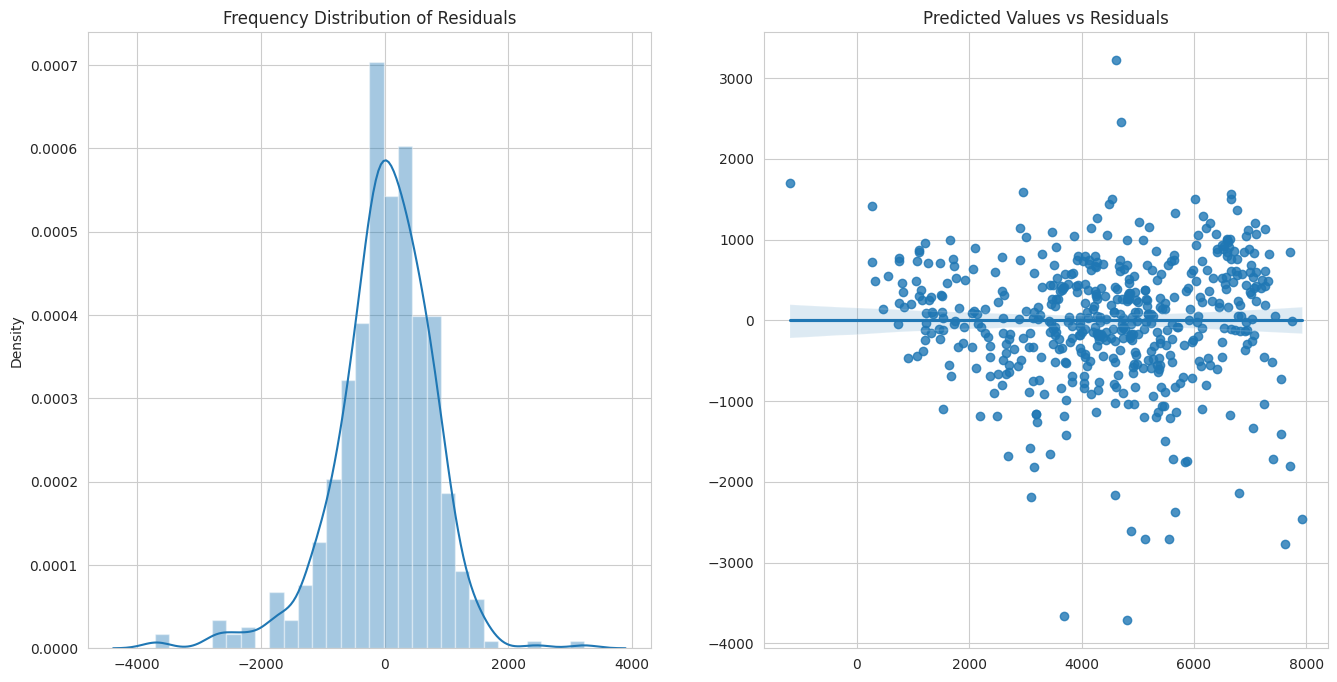

In [83]:
# Residual Analysis of Trained Data
X_train_sm = sm.add_constant(X_train[selected_features])

y_train_pred = final_model.predict(X_train_sm)
fig,ax = plt.subplots(1,2)
fig.set_figheight(8)
fig.set_figwidth(16)

ax[0].set(title='Frequency Distribution of Residuals')
sns.distplot(y_train-y_train_pred, bins=30, ax=ax[0])

ax[1].set(title='Predicted Values vs Residuals')
sns.regplot(x=y_train_pred, y=y_train-y_train_pred, ax=ax[1])
plt.show()


In [84]:
# Mean of Residuals
(y_train-y_train_pred).mean()

-3.0316490059097606e-13


The mean of the residuals being very close to zero (in this case, approximately -3.03e-13) suggests that, on average, the model is unbiased in its predictions. This means that, overall, the model neither consistently overpredicts nor underpredicts the target variable.

Here's what the mean of residuals being close to zero implies:

Unbiased Model: The model's predictions tend to be centered around the actual values, which is a desirable trait for a regression model.

Good Fit: A mean residual close to zero indicates that, on average, the model captures the underlying patterns in the data well. It suggests that the model is not systematically missing any important information and that it's fitting the data reasonably well.

Correct Specification: The model's assumptions about the relationship between the predictors and the target variable might be valid, at least to some extent.

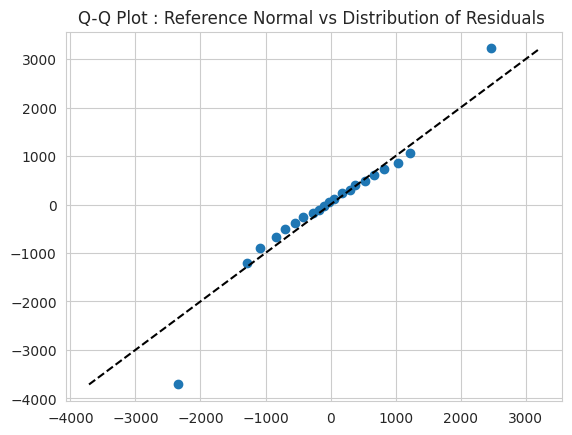

In [85]:
# Verifying the normality of distribution of residuals
mean = (y_train-y_train_pred).mean()
std = (y_train-y_train_pred).std()

ref_normal = np.random.normal(mean,std,(y_train-y_train_pred).shape[0])


percs = np.linspace(0,100,21)
qn_ref_normal = np.percentile(ref_normal, percs)
qn_residual = np.percentile(y_train - y_train_pred , percs)

plt.plot(qn_ref_normal,qn_residual, ls="", marker="o")

x = np.linspace(np.min((qn_ref_normal.min(),qn_residual.min())), np.max((qn_ref_normal.max(),qn_residual.max())))
plt.plot(x,x, color="k", ls="--")
plt.title('Q-Q Plot : Reference Normal vs Distribution of Residuals ')
plt.show()


This plot further shows that the residual distribution is approximately normal for all test data with values within range of training data. Extrapolated points show significant predict inaccuracy.

<Axes: xlabel='y(t)', ylabel='y(t + 1)'>

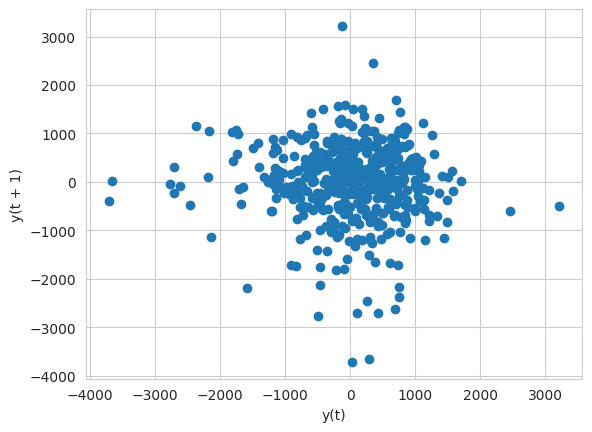

In [86]:
# lag plot to assess independence of data points
from pandas.plotting import lag_plot
lag_plot(y_train-y_train_pred)

Lagplot of residuals shows no trend. Hence the error terms have constant variance
Hence, assumptions of Linear Regression are satisfied by this model



**Prediction**

In [87]:
y_test = dtest.pop('cnt')
X_test = dtest
X_test[num_vars] = numerical_scaler.transform(X_test[num_vars])
X_test = X_test[selected_features]
X_test = sm.add_constant(X_test)
y_test_pred = final_model.predict(X_test)

**Model Evaluation¶**

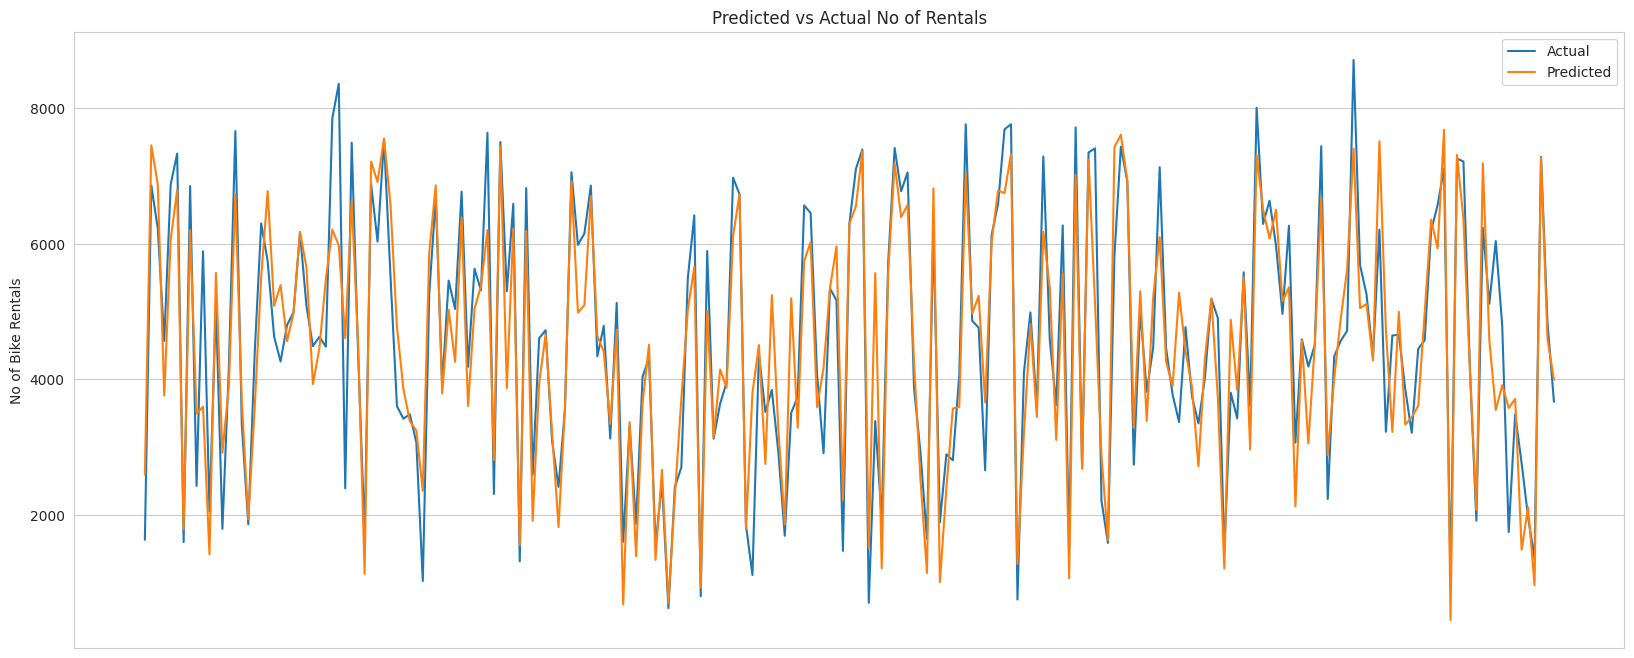

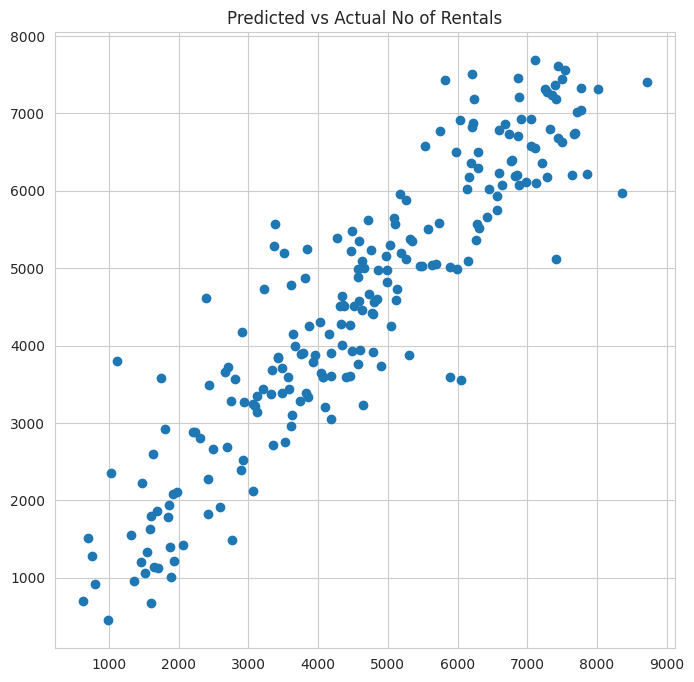

In [88]:
# Plotting Actual vs Predicted No of rentals
fig,ax = plt.subplots()
fig.set_figheight(8)
fig.set_figwidth(20)
l1,=ax.plot(range(len(y_test)),y_test)
l2, = ax.plot(range(len(y_test_pred)),y_test_pred)
plt.legend([l1,l2],['Actual','Predicted'])
plt.title('Predicted vs Actual No of Rentals');
plt.ylabel('No of Bike Rentals')
plt.xticks([])
plt.show()

plt.figure(figsize=[8,8])
plt.scatter(y_test,y_test_pred);
plt.title('Predicted vs Actual No of Rentals');

Predicted vs observed value plots shows that the model is reasonably accurate.

In [89]:
from sklearn.metrics import mean_squared_error,r2_score
mse = mean_squared_error(y_test, y_test_pred)
rsquared_test = r2_score(y_test, y_test_pred)
rsquared_train = r2_score(y_train, y_train_pred)
print('R-squared for train data:',round(rsquared_train,2))
print('R-squared for test data:',round(rsquared_test,2))
print('Mean Squared Error',round(mse,3))

R-squared for train data: 0.84
R-squared for test data: 0.83
Mean Squared Error 624431.244


**Model Stability**

In [90]:
# R-square using cross validation

from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
clr = cross_val_score(lr,X_train[selected_features],y_train,cv=10, scoring='r2')
clr

array([0.88433828, 0.7773103 , 0.74492583, 0.83686286, 0.89641009,
       0.83604406, 0.86880333, 0.69817507, 0.78268858, 0.81038088])

In [91]:
print("R-square at 0.95 confidence level : %0.2f (+/- %0.2f)" % (clr.mean(), clr.std() * 2))


R-square at 0.95 confidence level : 0.81 (+/- 0.12)


In [92]:
selected_features

array(['yr', 'Saturday', 'september', 'november',
       'Light rain_Light snow_Thunderstorm', 'winter', 'july', 'spring',
       'workingday', 'atemp', 'windspeed', 'hum', 'Mist_cloudy'],
      dtype=object)

**Top Features**

In [95]:
# standardizing numerical variables

from sklearn.preprocessing import StandardScaler
reg_features = selected_features
scaler = StandardScaler()
data = X_train[selected_features]
std_num = scaler.fit(data[['atemp','windspeed','hum']])


std_X_train = pd.DataFrame(data = scaler.transform(data[['atemp','windspeed','hum']]), columns=['atemp','windspeed','hum'])
for i in reg_features :
    std_X_train[i] = data[i].values


reshaped_y_train = y_train.values.reshape(-1,1)

# Fitting linear regression model
std_model = lr.fit(std_X_train, reshaped_y_train)

# Coefficients and intercept
result = pd.DataFrame(data = std_model.coef_, columns = std_X_train.columns, index=['MLR Coefficients']).T
result = result.sort_values(by='MLR Coefficients',ascending=False)
print('\nIntercept :',std_model.intercept_)
result


Intercept : [2475.58465672]


,MLR Coefficients
atemp,4099.972163
yr,2000.813889
Saturday,685.560556
winter,625.322329
september,586.229282
workingday,513.321998
Mist_cloudy,-561.583892
july,-580.750606
november,-596.496038
windspeed,-791.687695


**Conclusion**


Analysis is carried out using a Mixed Feature Selection Approach. 15 features are selected algorithmically using Recursive Feature Elimination. Further selection is done manually by looking at multicollinearity and statistical significance of features and overall fit of the model. The 13 most significant features to understand demand have been reported.

The data set is randomly divided into training and test data. Final Model built on training data set explains 84% of the variability and achieves 81% on test data.
The final relationship between demand and predictors is as follows.

cnt = 4527.31685981 + 2000.813889 yr + 685.560556 Saturday + 625.322329 winter + 586.229282 september  - 890.3115 july -561.583892 Mist_cloudy + 513.321998 workingday -1341.146803 hum -1100.976725 spring + 4099.972163 atemp -791.687695 windspeed -2051.379041 light snow/rain.

where atemp , windspeed and hum are normalized.